## 1. Import Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Importing Scikit Library

import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## 2. Reading of Data and Inspection

In [178]:
# Reading data from file 'day.csv' 

boom_bike = pd.read_csv('day.csv')

# Preview the first 10 lines of the loaded data
boom_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [179]:
#Determining the number of rows and columns

boom_bike.shape

(730, 16)

In [180]:
#summary of all the numeric columns in the dataset

boom_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [181]:
#Datatypes of each column

boom_bike.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1. 'dteday' columns has a object as datatype rest all columns have integer or float data type
2. There are overall 730 rows and 16 columns in data set 


## 3.Check missing values

In [182]:
#Column-wise null count 
boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [183]:
#Percentage of missing values for all columns 

null_count=round(100*(boom_bike.isnull().sum()/len(boom_bike.index)),2)
null_count

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Insight

As from above we can see that there are no missing or null values in data set.

## 4.Data Cleaning

### 4.1 Removing Unwanted Columns

In [184]:
# Removing 'instant' column as it has only index value

boom_bike.drop(['instant'],axis=1,inplace=True)

boom_bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [185]:
# From data removing 'dteday' column as we have a seperate column in data for month and days

boom_bike.drop(['dteday'],axis=1,inplace=True)

boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [186]:
# From data removing 'casual' & 'registered' column as column 'cnt' is summation of 'casual' & 'registered'

boom_bike.drop(['casual','registered'],axis=1,inplace=True)

boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [187]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### 4.2 Changing Column Values As Per Data Dictionary

In [188]:
# Replacing 'season' column as 1:spring, 2:summer, 3:fall, 4:winter

boom_bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
boom_bike.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [189]:
# Replacing 'weekday' column as 0:Sunday,1:Monday,2:Tuesday,3:Wednesday,4:Thursday,5:Friday,6:Saturday

boom_bike['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
boom_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [190]:
# Replacing 'weathersit' column as 1: Clear, 2: Mist + Few clouds, 3:Light Snow, 4: Snow + Fog

boom_bike['weathersit'].replace({1: 'Clear', 2: 'Mist + Few clouds', 3:'Light Snow', 4: 'Snow + Fog'},inplace=True)
boom_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist + Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist + Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist + Few clouds,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist + Few clouds,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [191]:
# Replacing 'mnth' column as 1: Jan, 2: Feb, 3: Mar, 4: Apr 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, 12: dec

boom_bike['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)
boom_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist + Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist + Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,Mist + Few clouds,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,Mist + Few clouds,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [192]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 5. EDA

#### 5.1 Numeric Analysis

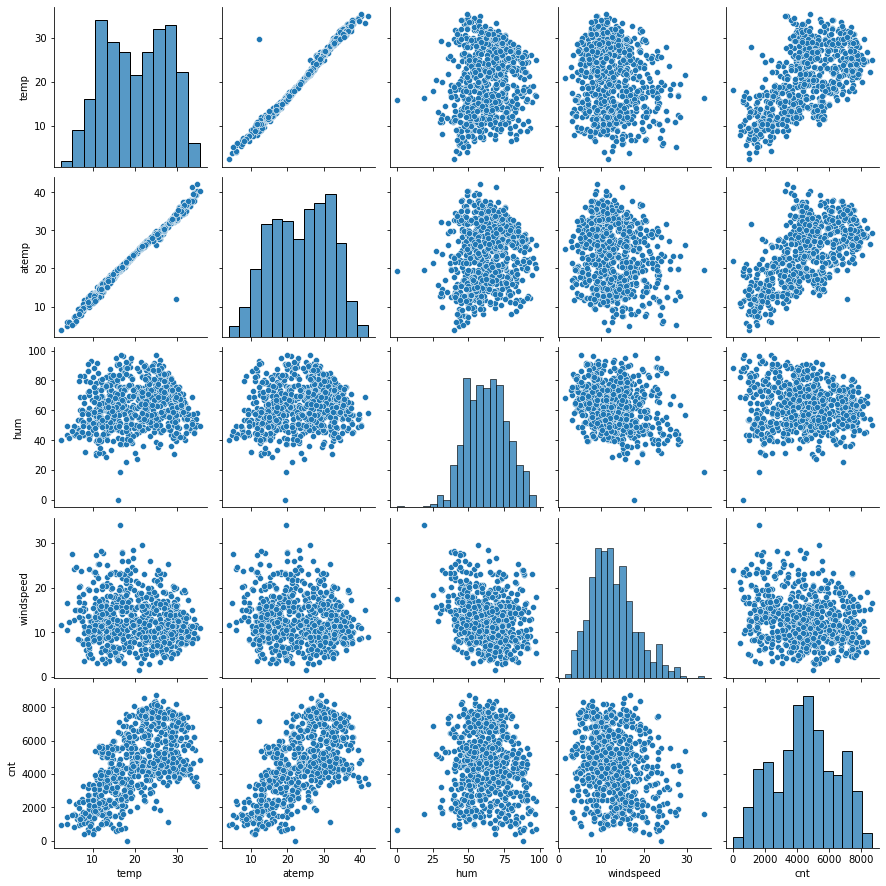

<Figure size 720x720 with 0 Axes>

In [193]:
boom_bike_num = boom_bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(boom_bike_num)
plt.figure(figsize = (10,10))
plt.show()

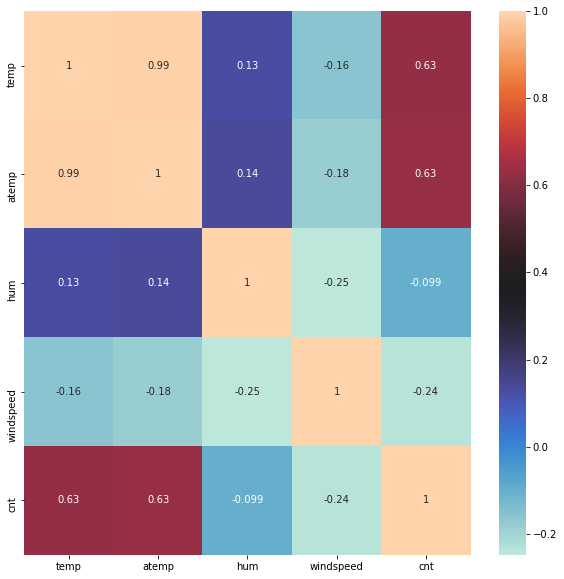

In [194]:
plt.figure(figsize = (10,10))
sns.heatmap(boom_bike_num.corr(),annot=True,cmap='icefire')
plt.show()

### Inference
By looking at pair plot and heat map there is linear relationship between 'temp' and 'atemp' but we can't make use of these values at model evaluation because of high multicollinerity, so later we will choose which value to keep dependent on VIF and p value with other variable.   

### 5.2 Categorical analysis

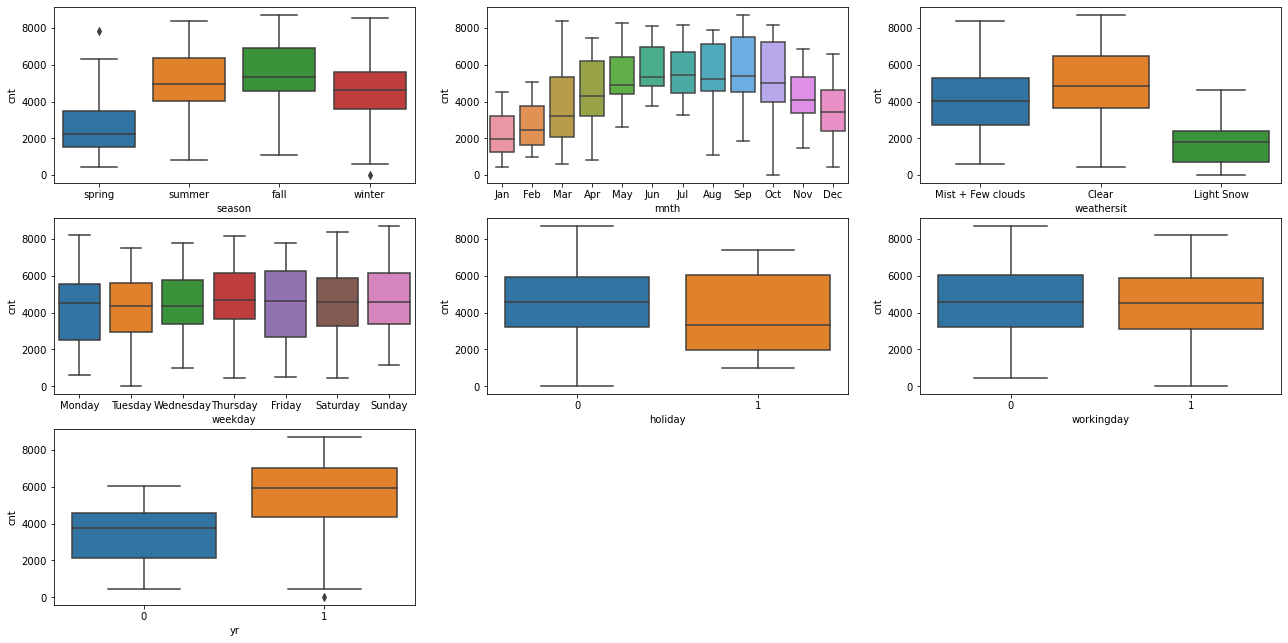

In [195]:
# Here we will analyse how each predictor variable make sense with the target variable 'cnt' with the help of box plot

plt.figure(figsize=(22,11))
plt.subplot(3,3,1)
sns.boxplot(data = boom_bike ,x = 'season', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = boom_bike,x = 'mnth', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = boom_bike, x = 'weathersit', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = boom_bike,x = 'weekday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = boom_bike,x = 'holiday', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = boom_bike,x = 'workingday', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = boom_bike,x = 'yr', y = 'cnt')
plt.show()

### 5.2.1 Individual Plot w.r.t Targent variable 'cnt'

In [196]:
# individual ploting w.r.t target variable
def bike_barplot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=boom_bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=boom_bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

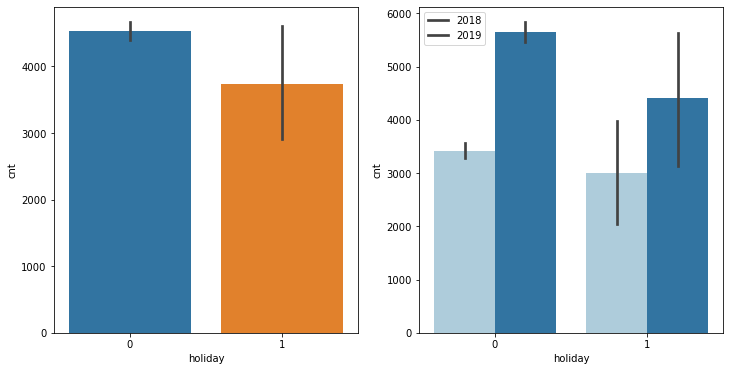

In [197]:
bike_barplot('holiday',12,6)

From above graph we can observe that:-
1. Maximum number of bike booking occur during working day.


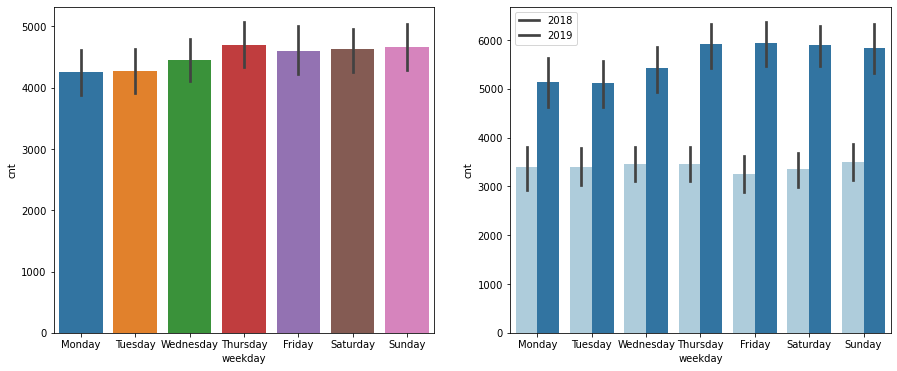

In [198]:
bike_barplot('weekday',15,6)

From above graph we can observe that:-

There was no significant change among the weekday variables,it shows very close trend of total bookings on all days of week.

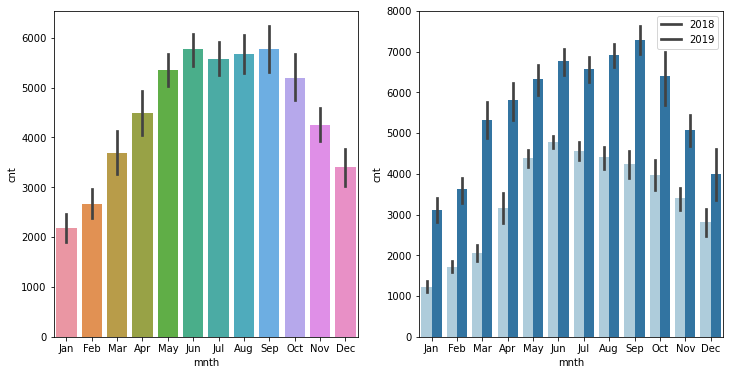

In [199]:
bike_barplot('mnth',12,6)

From above graph we can observe that:-
1. As compared to year 2018 in 2019 more booking took place.
2. In year 2008 and 2019 from month may to sept the highest number of booking took place.

So, from this plot we can conclude that we that the month can be a good predictor of the dependent variable

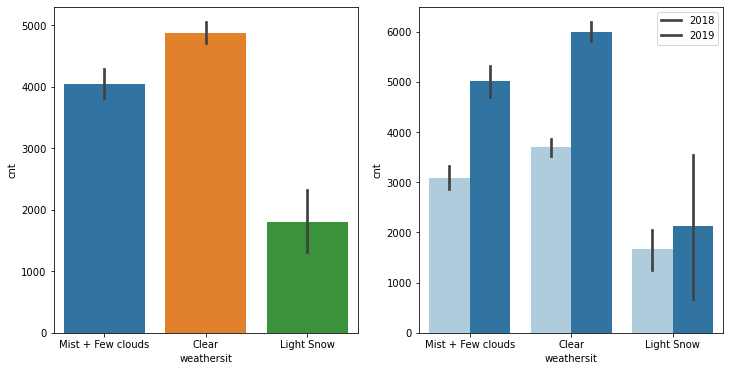

In [200]:
bike_barplot('weathersit',12,6)

From above graph we can observe that:-
1. Highest number of booking occur when there is Clear weathersit followed by Mist+Few clouds, Light snow.

So, from this plot we can conclude that we that the Weathersit can be a good predictor of the dependent variable.

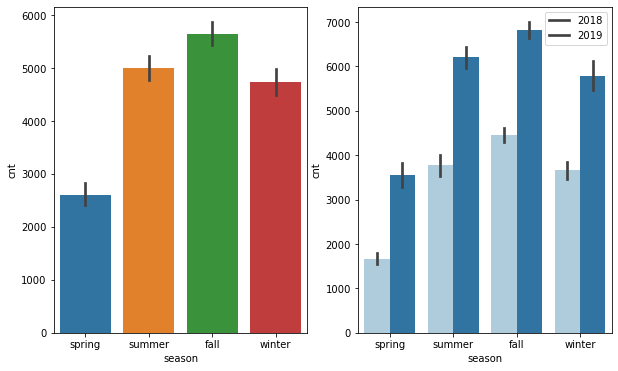

In [201]:
bike_barplot('season',10,6)

From above graph we can observe that:-

1. Highest number of booking occur when there is Fall season followed by summer, winter and spring.

So, from this plot we can conclude that we that the Season can be a good predictor of the dependent variable.

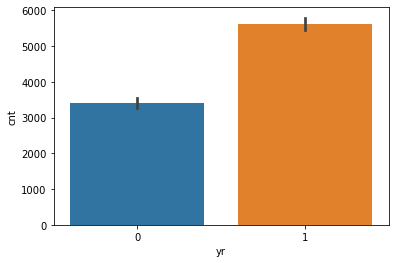

In [202]:
#checking year column is important or not
sns.barplot('yr','cnt',data=boom_bike)
plt.show()

From above graph we can observe that:-

1. Booking is increased in 2019 as compared to 2018. 

So, from this plot we can conclude that we that the Season can be a good predictor of the dependent variable.

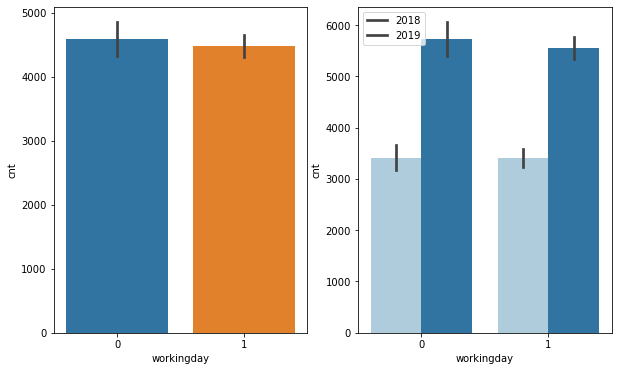

In [203]:
bike_barplot('workingday',10,6)

From above graph we can observe that:-
1. More bike booking occur in working day so from plot we can conclude that working daya can be good predictor of the dependent variable

### 6.1 Creating Dummy Variable

In [204]:
month = pd.get_dummies(boom_bike['mnth'],drop_first=True)
month.head(10)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0


In [205]:
Weather_sit = pd.get_dummies(boom_bike['weathersit'],drop_first=True)
Weather_sit.head(10)

,Light Snow,Mist + Few clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,0,0


In [206]:
season = pd.get_dummies(boom_bike['season'],drop_first=True)
season.head(10)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [207]:
week_day = pd.get_dummies(boom_bike['weekday'],drop_first=True)
week_day.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### 6.2 Merging data Frame

In [208]:
boombike = pd.concat([boom_bike,season,month,Weather_sit,week_day], axis = 1)
boombike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,Mist + Few clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist + Few clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,spring,0,Jan,0,Sunday,0,Mist + Few clouds,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7,spring,0,Jan,0,Monday,1,Mist + Few clouds,6.765000,8.11270,53.5833,17.875868,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [209]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    object 
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  spring             730 non-null    uint8  
 13  summer             730 non-null    uint8  
 14  winter             730 non-null    uint8  
 15  Aug                730 non-null    uint8  
 16  Dec                730 non

In [210]:
boombike.shape

(730, 34)

### 6.3 Dropping Unnecessary Columns 

In [211]:

boombike.drop(['season','weekday','mnth','weathersit'],axis=1,inplace=True)


In [212]:
boombike.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [213]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   spring             730 non-null    uint8  
 9   summer             730 non-null    uint8  
 10  winter             730 non-null    uint8  
 11  Aug                730 non-null    uint8  
 12  Dec                730 non-null    uint8  
 13  Feb                730 non-null    uint8  
 14  Jan                730 non-null    uint8  
 15  Jul                730 non-null    uint8  
 16  Jun                730 non

In [214]:
boombike.shape

(730, 30)

## 7.1 Splitting the Data into Training and Testing Sets

In [215]:
np.random.seed(0)
boombike_train, boombike_test = train_test_split(boombike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [216]:
boombike_train.shape

(510, 30)

In [217]:
boombike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [218]:
boombike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
boombike_test.shape

(219, 30)

In [220]:
boombike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inferences:-

As We can Observe after splitting the data in 70% & 30% between the train and test dataset we have 510 rows in train dataset and 219 in test dataset.

### 7.2 Rescaling the Features (Train Data)

In [221]:
# Rescalling model using MinMaxScaler
scaler = MinMaxScaler()

In [222]:
boombike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [223]:
#Rescalling all the numeric columns expect having 0 & 1
to_rescaler = ['temp','atemp','hum','windspeed','cnt']
boombike_train[to_rescaler] = scaler.fit_transform(boombike_train[to_rescaler])

In [224]:
boombike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## 7.3 Checking Multicollinearity

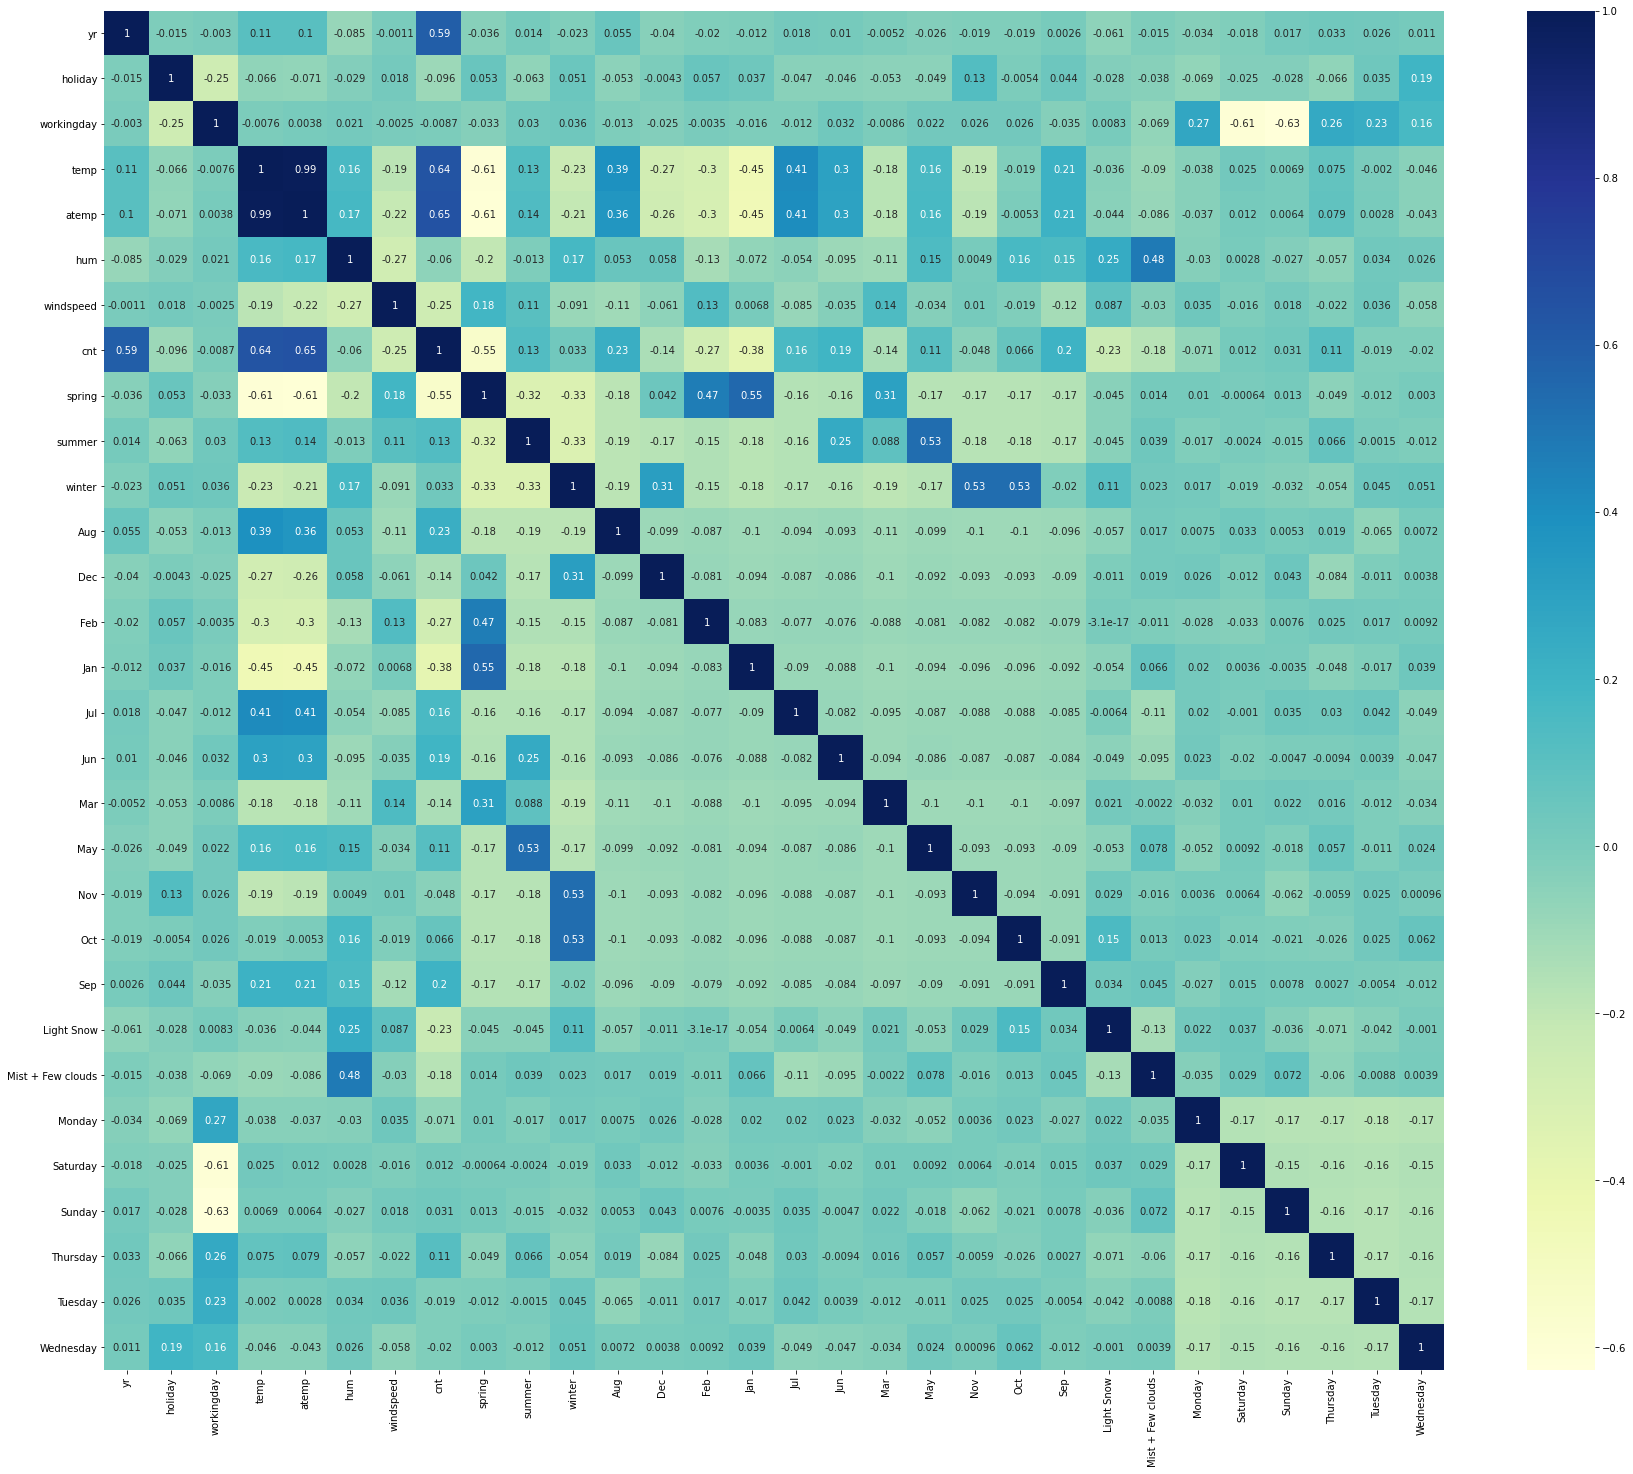

In [225]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(boombike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inferences

1. Mist+Few clouds and humidity variables had positive corelation.
2. Column Cnt has high correlation with temp, atemp, yr.
3. Workingday column has high negative correlation with Saturday and Sunday.

### 7.4 Dividing into X and Y sets for the model building

In [226]:
# target variable should be on Y. here our target variable is cnt
y_train = boombike_train.pop('cnt')
X_train = boombike_train

## 8 Feature Selection

We will do feature selection with Automated approach (RFE)

In [227]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [228]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Few clouds', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [229]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow',
       'Mist + Few clouds'],
      dtype='object')

In [230]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [231]:
X_train_rfe = X_train[col]

In [232]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [233]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist + Few clouds,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


### Inferences

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### 8.1 Model 1

In [234]:
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lrm1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.34e-189
Time:                        21:09:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.03

Dropping of 'hum' because of high VIF value

In [235]:
# We are dropping 'hum' columns as it has high VIF value

X_train_rfe_1 = X_train_rfe.drop(['hum'], axis = 1)

calculateVIF(X_train_rfe_1)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist + Few clouds,1.56


### 8.2 Model 2

In [236]:
X_train_lm2 = sm.add_constant(X_train_rfe_1)

# Creating a first fitted model
lrm2 = sm.OLS(y_train, X_train_lm2).fit()

# Printing a summary of the linear regression model obtained
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.57e-186
Time:                        21:09:57   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2466      0.03

In [237]:
X_train_rfe_2 = X_train_rfe_1.drop(['summer'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe_2)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist + Few clouds,1.53
6,Dec,1.46
8,Jul,1.36


### Model 3

In [238]:
X_train_lm3 = sm.add_constant(X_train_rfe_2)

# Creating a first fitted model
lrm3 = sm.OLS(y_train, X_train_lm3).fit()

# Printing a summary of the linear regression model obtained
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.08e-186
Time:                        21:09:57   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2893      0.02

In [239]:
lrm3.params

const                0.289327
yr                   0.234795
holiday             -0.091280
temp                 0.402583
windspeed           -0.154010
spring              -0.103373
winter               0.064977
Dec                 -0.050984
Jan                 -0.055626
Jul                 -0.064343
Nov                 -0.048827
Sep                  0.053670
Light Snow          -0.294885
Mist + Few clouds   -0.081190
dtype: float64

### Inference

1. By observing this model seems to be look good as it have low multicollinearity between predictors and p-values for all predictors to be significant.
2. For now we will consider it to a final model

## 9. Model Interpretation

Hypothesis Testing :

Hypothesis Testing States that

H0:B1=B2=...=Bn=0

H1: at least one Bi!=0


In [240]:
lrm3.params

const                0.289327
yr                   0.234795
holiday             -0.091280
temp                 0.402583
windspeed           -0.154010
spring              -0.103373
winter               0.064977
Dec                 -0.050984
Jan                 -0.055626
Jul                 -0.064343
Nov                 -0.048827
Sep                  0.053670
Light Snow          -0.294885
Mist + Few clouds   -0.081190
dtype: float64

### Inferences

1. By observing lrm2 model params we can conclude that all our coefficient are not equal to zero so we can reject Null hypothesis and can accept alternate hypothesis.

2. As we know F-statistic is used to validate overall significance of model, higher F-statistic more significant will be the model. 

3. F-statistic of model we got it as 230.4 which is greater than 1 and p value is nearly equal to zero, therefore it states that overall model is significant


4. Equation of Model Based on lrm2 is as follows

### cnt = 0.289327 + (0.234795*yr) - (0.091280*holiday) + (0.402583*temp) - (0.154010*windspeed) - (0.103373*spring) + (0.064977*winter) - (0.050984*Dec) - (0.055626*Jan)- (0.064343*Jul) - (0.048827*Nov) + (0.053670*Sep) - (0.294885*Light Snow) - (0.081190* Mist+ Fewclouds)


## 10. Model Validation

### Checking weather the model validate the assumptions of Linear reggression or not

1. There is Linear relationship between X & Y.
2. Error terms shouldnot have constant varience( i.e Homoscedasticity)
3. Error terms are independent to each other.
4. Error terms are normally distributed with mean zero(not x,y).

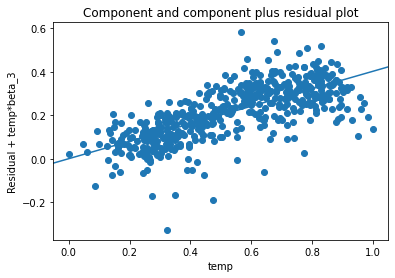

In [241]:
sm.graphics.plot_ccpr(lrm3, 'temp')
plt.show()

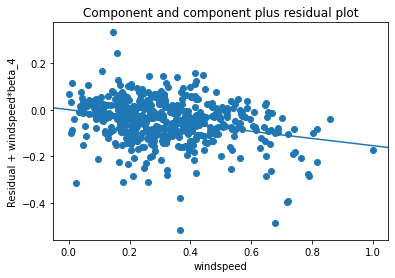

In [242]:
sm.graphics.plot_ccpr(lrm3, 'windspeed')
plt.show()

### Inference
 From above plot we can observe there is linear relationship between X and Y

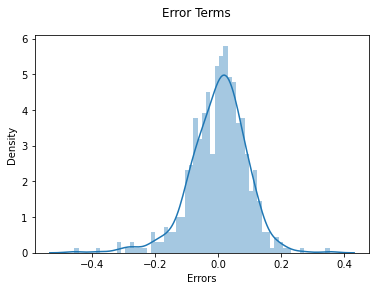

In [243]:
y_train_pred = lrm3.predict(X_train_lm3)
residuals = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 60)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

### Inferences

From the above plot we can observe that errors terms are normally distributed with mean zero.

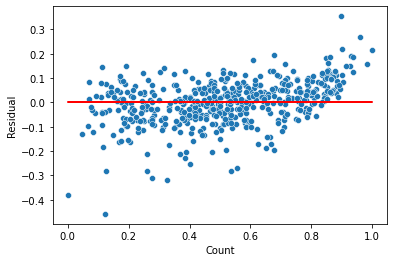

In [244]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Inferences

From the above scatter plot we can observe that there is no constant variance.

## 11. Testing the Model

### Here we will test the data and make the prediction

### 11.1 Recalling Test Data

In [245]:
to_rs = ['temp', 'atemp', 'hum', 'windspeed','cnt']
boombike_test[to_rs] = scaler.transform(boombike_test[to_rs])
boombike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [246]:
boombike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist + Few clouds,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 11.2 Dividing into X_test and y_test

In [247]:
y_test = boombike_test.pop('cnt')
X_test = boombike_test

In [248]:
col1=X_train_rfe_2.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

test_lrm = sm.OLS(y_test, X_test_lm).fit()

# Print a summary of the linear regression model obtained
print(test_lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     83.73
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.83e-74
Time:                        21:10:02   Log-Likelihood:                 224.62
No. Observations:                 219   AIC:                            -421.2
Df Residuals:                     205   BIC:                            -373.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3078      0.03

### 11.3 Model Evaluation

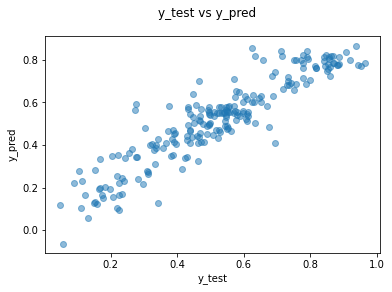

In [249]:
y_pred = test_lrm.predict(X_test_lm)

fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

### Inferences

Here we will how the predicted Y value is similar to actual Y value.


### 11.4 Comparing the models using Rsquare

In [250]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8415

    Measurement	           Train Dataset	         Test Dataset
    
    R2 Value	               83.8%	                84.2%
    
    Adjusted R2 Value	       83.4%	                83.1%

In [253]:
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0868

### Inferences

The Root Mean Squared Error(RMSE) value for the final model is 0.0868 which indicates that the model is pretty good

## 12. Conclusion

cnt = 0.289327 + (0.234795yr) - (0.091280holiday) + (0.402583temp) - (0.154010windspeed) - (0.103373spring) + (0.064977winter) - (0.050984Dec) - (0.055626Jan)- (0.064343Jul) - (0.048827Nov) + (0.053670Sep) - (0.294885*Light Snow) - (0.081190 Mist+ Fewclouds)


As per model following results has been seen

1. Year (yr):- A coefficient value of yr indicated that a year wise the rental numbers are increasing.

2. Temperature (temp):-  A coefficient value of temp indicates that temperature has significant impact on bike bookings and it is an imp parameter for building a model.

3. Light snow :-  A coefficient value of Light snow indicates there will we the decrease in bike bookings if there is any rain or snowfall or due to bad weather condition.